In [1]:
# playing with The UCI ML News Aggregator Dataset http://archive.ics.uci.edu/ml/datasets/News+Aggregator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
#import data and add header row
news = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", sep="\t",
                  names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

In [3]:
#first six rows
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
#lowercase text and removing punctuation in title to have smaller size of model in future
import string

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    return s

news['TITLE'] = [normalize(s) for s in news['TITLE']]
    

In [5]:
#first six rows
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,fed official says weak data caused by weather ...,http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,feds charles plosser sees high bar for change ...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,us open stocks fall after fed official hints a...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,fed risks falling behind the curve charles plo...,http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,feds plosser nasty weather has curbed job growth,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [6]:
news['CATEGORY'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

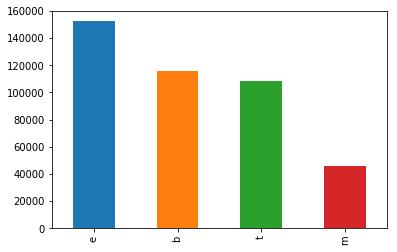

In [102]:
news['CATEGORY'].value_counts().plot(kind='bar')

In [9]:
#import vectorizers and transformer
#use CountVectorizer + TfidfTransformer | TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

###### USE WITHOUT PIPELINE ########
#vectorize text in title
#vectorizer = CountVectorizer(stop_words = 'english')
#x_data = vectorizer.fit_transform(news['TITLE'])

In [10]:
# taken from Ritchie Ng post "Vectorization, Multinomial Naive Bayes Classifier and Evaluation"
# http://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

# Why are we splitting into training and testing sets before vectorizing?

# If we vectorize then we train/test split, our document-term matrix would contain every single feature (word) 
# in the test and training sets
# What we want is to simulate the real world
# We would always see words we have not seen before
# so this method is not realistic and we cannot properly evaluate our models
# Split then vectorize (correct way)

# We do the train/test split before the CountVectorizer to properly simulate the real world
# where our future data contains words we have not seen before
# After you train your data and chose the best model,
# you would then train on all of your data before predicting actual future data to maximize learning.

In [11]:
#split data into train and test subsets
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(x_data, news['CATEGORY'], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(news['TITLE'], news['CATEGORY'], random_state=42)

print(X_train.shape)
print(X_test.shape)
#(observations - labels(unique word), occurences - number of unique words in all corpus of headlines)

(316814,)
(105605,)


In [12]:
#building a classifier
from sklearn.naive_bayes import MultinomialNB

###### USE WITHOUT PIPELINE ########
#clf_mnb = MultinomialNB(alpha=.01).fit(X_train, y_train)

In [13]:
###### USE WITHOUT PIPELINE ########
#testing on test data
#predicted = clf_mnb.predict(X_test)
#np.mean(predicted == y_test)

In [14]:
###### USE WITHOUT PIPELINE ########
#alternative to above & np
#clf_mnb.score(X_test, y_test)

In [15]:
#predicted

In [16]:
#to check all out metricts
from sklearn import metrics

#metrics.f1_score(y_test, predicted, average='macro')

In [17]:
from sklearn.metrics import classification_report
#print(classification_report(y_test, predicted))

In [18]:
#pipeline for Naive Bayse classifier

from sklearn.pipeline import Pipeline
clf_mnb = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        #('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB(alpha=.01)),
    ])


In [19]:
#.fit(train) - learns the vocabulary of the training data
clf_mnb = clf_mnb.fit(X_train, y_train)

In [20]:
# apply on text data

predicted = clf_mnb.predict(X_test)
np.mean(predicted == y_test)

0.9295109133090289

In [21]:
#tune params in GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}
gs_clf_mnb = GridSearchCV(clf_mnb, parameters, n_jobs=-1)
gs_clf_mnb = gs_clf_mnb.fit(X_train, y_train)

In [22]:
#check out best score with tuned params
gs_clf_mnb.best_score_

0.9490142481077225

In [23]:
#best params for clf
gs_clf_mnb.best_params_

{'clf__alpha': 0.01, 'vect__ngram_range': (1, 2)}

In [24]:
#apply GridSearch params on test data
predicted = gs_clf_mnb.predict(X_test)
np.mean(predicted == y_test)

0.9521897637422471

In [25]:
from sklearn.metrics import classification_report

#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
#y_true = Ground truth (correct) target values.
#y_pred = Estimated targets as returned by a classifier.
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          b       0.94      0.93      0.93     29117
          e       0.98      0.98      0.98     37988
          m       0.95      0.95      0.95     11319
          t       0.93      0.94      0.94     27181

avg / total       0.95      0.95      0.95    105605



In [26]:
#confusion matrix for gs_clf_mnb
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

[[27155   345   298  1319]
 [  333 37157   129   369]
 [  279   207 10712   121]
 [ 1225   309   115 25532]]


In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predicted, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predicted, average = 'weighted'))

Accuracy score:  0.9521897637422471
Recall score:  0.9521897637422471
Precision score:  0.9521917994708027
F1 score:  0.9521866148926127


In [28]:
# calculate predicted probabilities for predicted (well calibrated)
y_pred_prob_mnb = gs_clf_mnb.predict_proba(predicted)[:, 1]
y_pred_prob_mnb

array([0.36135082, 0.36135082, 0.36135082, ..., 0.36135082, 0.36135082,
       0.36135082])

In [29]:
#check false negatives
#false_n = X_test[predicted < y_test]
#false_n

In [92]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
# Pipeline for SVM Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

#using calibrated classifier to predict probabilities for each label
clf_svm = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        #('clf', SGDClassifier(loss='hinge', alpha=1e-3, max_iter=5, random_state=42)),
        ('clf', CalibratedClassifierCV(LinearSVC(loss='squared_hinge', max_iter=5, random_state=42))),
    ])

In [93]:
clf_svm = clf_svm.fit(X_train, y_train)
predicted = clf_svm.predict(X_test)
np.mean(predicted == y_test)

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytsev

0.9437810709720184

In [94]:
# GridSearch for SVM

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'clf__C': [1],
}
gs_clf_svm = GridSearchCV(clf_svm, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
gs_clf_svm.best_score_

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytsev

0.9516940539243847

In [95]:
gs_clf_svm.best_params_

{'vect__ngram_range': (1, 2)}

In [96]:
# apply GridSearch params svm on test data
predicted = gs_clf_svm.predict(X_test)
np.mean(predicted == y_test)

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:510: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))


0.9529094266369964

In [97]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          b       0.94      0.93      0.93     29117
          e       0.98      0.98      0.98     37988
          m       0.96      0.94      0.95     11319
          t       0.93      0.95      0.94     27181

avg / total       0.95      0.95      0.95    105605



In [98]:
# confusion matrix for gs_clf_svm
print(confusion_matrix(y_test, predicted))

[[26940   350   233  1594]
 [  390 37283   100   215]
 [  347   193 10681    98]
 [ 1015   351    87 25728]]


In [99]:
print("Accuracy score: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predicted, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predicted, average = 'weighted'))

Accuracy score:  0.9529094266369964
Recall score:  0.9529094266369964
Precision score:  0.9529241561236163
F1 score:  0.9528745020939905


In [101]:
# calculate predicted probabilities for predicted (well calibrated)
y_pred_prob_svm = gs_clf_svm.predict_proba(predicted)
y_pred_prob_svm

array([[0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       ...,
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657]])

In [104]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier
#clf_logreg = LogisticRegression()

In [105]:
# Pipeline for Logistic Regression

clf_logreg = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        ('clf', LogisticRegression(solver='newton-cg', multi_class='multinomial')),
    ])

In [106]:
clf_logreg = clf_logreg.fit(X_train, y_train)
predicted = clf_logreg.predict(X_test)
np.mean(predicted == y_test)

0.9466407840537854

In [107]:
# GridSearch for Logistic Regression

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
}
gs_clf_logreg = GridSearchCV(clf_logreg, parameters, n_jobs=-1)
gs_clf_logreg = gs_clf_logreg.fit(X_train, y_train)
gs_clf_logreg.best_score_

0.9495729355394648

In [108]:
gs_clf_logreg.best_params_

{'vect__ngram_range': (1, 2)}

In [109]:
# apply GridSearch params logreg on test data
predicted = gs_clf_logreg.predict(X_test)
np.mean(predicted == y_test)

0.9531461578523744

In [110]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          b       0.93      0.94      0.94     29117
          e       0.97      0.98      0.98     37988
          m       0.97      0.93      0.95     11319
          t       0.94      0.94      0.94     27181

avg / total       0.95      0.95      0.95    105605



In [111]:
# confusion matrix for gs_clf_logreg
print(confusion_matrix(y_test, predicted))

[[27404   387   191  1135]
 [  379 37267    97   245]
 [  387   250 10546   136]
 [ 1273   386    82 25440]]


In [112]:
print("Accuracy score: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predicted, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predicted, average = 'weighted'))

Accuracy score:  0.9531461578523744
Recall score:  0.9531461578523744
Precision score:  0.9531871706999675
F1 score:  0.9531155680256468


In [113]:
import matplotlib.pyplot as plt
import scikitplot as skplt

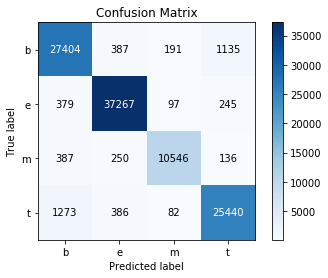

In [114]:
skplt.metrics.plot_confusion_matrix(y_test, predicted)

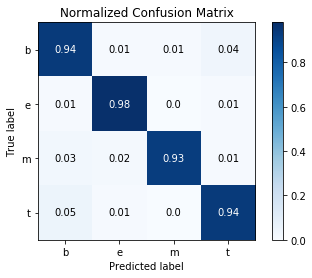

In [115]:
skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True)

In [116]:
# calculate predicted probabilities for predicted (well calibrated)
y_pred_prob_logreg = gs_clf_logreg.predict_proba(predicted)[:, 1]
y_pred_prob_logreg

array([0.36196559, 0.36196559, 0.36196559, ..., 0.36196559, 0.36196559,
       0.36196559])

In [117]:
# calculate accuracy
metrics.accuracy_score(y_test, predicted)

0.9531461578523744

In [53]:
from sklearn import model_selection
seed = 42
# prepare models
models = []
models.append(('MNB', gs_clf_mnb))
models.append(('SVM', gs_clf_svm))
models.append(('LR', gs_clf_logreg))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, y_test, predicted, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...lass\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\runpy.py in _run_code(code=<code object <module> at 0x00000096D19B4A50, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\users\kzaytseva\appdata\local\continuum\anaco...ges\__pycache__\ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\users\kzaytseva\appdata\local\continuum\anaco...textclass\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...lass\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\users\\k...ss\\lib\\site-packages\\ipykernel\\kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...lass\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000096D19B4A50, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\users\kzaytseva\appdata\local\continuum\anaco...ges\__pycache__\ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\users\kzaytseva\appdata\local\continuum\anaco...textclass\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...lass\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\users\\k...ss\\lib\\site-packages\\ipykernel\\kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    276         if self.control_stream:
    277             self.control_stream.on_recv(self.dispatch_control, copy=False)
    278 
    279         def make_dispatcher(stream):
    280             def dispatcher(msg):
--> 281                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    282             return dispatcher
    283 
    284         for s in self.shell_streams:
    285             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 24, 11, 3, 2, 168480, tzinfo=tzutc()), 'msg_id': 'AAC911F933D14294936AEAE0D0B45BF8', 'msg_type': 'execute_request', 'session': '57E2290274FF4FB3ADE9AEF7000E3669', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'AAC911F933D14294936AEAE0D0B45BF8', 'msg_type': 'execute_request', 'parent_header': {}})
    227             self.log.warn("Unknown message type: %r", msg_type)
    228         else:
    229             self.log.debug("%s: %s", msg_type, msg)
    230             self.pre_handler_hook()
    231             try:
--> 232                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'57E2290274FF4FB3ADE9AEF7000E3669']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 24, 11, 3, 2, 168480, tzinfo=tzutc()), 'msg_id': 'AAC911F933D14294936AEAE0D0B45BF8', 'msg_type': 'execute_request', 'session': '57E2290274FF4FB3ADE9AEF7000E3669', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'AAC911F933D14294936AEAE0D0B45BF8', 'msg_type': 'execute_request', 'parent_header': {}}
    233             except Exception:
    234                 self.log.error("Exception in message handler:", exc_info=True)
    235             finally:
    236                 self.post_handler_hook()

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'57E2290274FF4FB3ADE9AEF7000E3669'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 24, 11, 3, 2, 168480, tzinfo=tzutc()), 'msg_id': 'AAC911F933D14294936AEAE0D0B45BF8', 'msg_type': 'execute_request', 'session': '57E2290274FF4FB3ADE9AEF7000E3669', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'AAC911F933D14294936AEAE0D0B45BF8', 'msg_type': 'execute_request', 'parent_header': {}})
    392         if not silent:
    393             self.execution_count += 1
    394             self._publish_execute_input(code, parent, self.execution_count)
    395 
    396         reply_content = self.do_execute(code, silent, store_history,
--> 397                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    398 
    399         # Flush output before sending the reply.
    400         sys.stdout.flush()
    401         sys.stderr.flush()

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn import model_selection\nseed = 42\n# ...ot(results)\nax.set_xticklabels(names)\nplt.show()\n', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.For object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-53-fc8bf5b4c86e>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 96e9be9128, execution..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000096F2271420, file "<ipython-input-53-fc8bf5b4c86e>", line 13>
        result = <ExecutionResult object at 96e9be9128, execution..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000096F2271420, file "<ipython-input-53-fc8bf5b4c86e>", line 13>, result=<ExecutionResult object at 96e9be9128, execution..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000096F2271420, file "<ipython-input-53-fc8bf5b4c86e>", line 13>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', '# playing with The UCI ML News Aggregator Datase...tplotlib.pyplot as plt\nimport scikitplot as skplt', '#import data and add header row\nnews = pd.read_c...", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])', '#first six rows\nnews.head()', "#lowercase text and removing punctuation in titl...LE'] = [normalize(s) for s in news['TITLE']]\n    ", '#first six rows\nnews.head()', "news['CATEGORY'].unique()", "news['CATEGORY'].value_counts()[:20].plot(kind='barh')", "news['CATEGORY'].value_counts().plot(kind='barh')", "#import vectorizers and transformer\n#use CountVe...#x_data = vectorizer.fit_transform(news['TITLE'])", '# taken from Ritchie Ng post "Vectorization, Mul...edicting actual future data to maximize learning.', '#split data into train and test subsets\nfrom skl...umber of unique words in all corpus of headlines)', '#building a classifier\nfrom sklearn.naive_bayes ... = MultinomialNB(alpha=.01).fit(X_train, y_train)', '###### USE WITHOUT PIPELINE ########\n#testing on...mnb.predict(X_test)\n#np.mean(predicted == y_test)', '###### USE WITHOUT PIPELINE ########\n#alternative to above & np\n#clf_mnb.score(X_test, y_test)', '#predicted', "#to check all out metricts\nfrom sklearn import m...rics.f1_score(y_test, predicted, average='macro')", 'from sklearn.metrics import classification_report\n#print(classification_report(y_test, predicted))', "#pipeline for Naive Bayse classifier\n\nfrom sklea...        ('clf', MultinomialNB(alpha=.01)),\n    ])", '#.fit(train) - learns the vocabulary of the training data\nclf_mnb = clf_mnb.fit(X_train, y_train)', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:    ID                                           ...UPQVP6sIxvM    www.moneynews.com  1394470372027  , 5:    ID                                           ...UPQVP6sIxvM    www.moneynews.com  1394470372027  , 6: array(['b', 't', 'e', 'm'], dtype=object), 7: <matplotlib.axes._subplots.AxesSubplot object>, 8: <matplotlib.axes._subplots.AxesSubplot object>, 20: 0.9295109133090289, 22: 0.9490142481077225, 23: {'clf__alpha': 0.01, 'vect__ngram_range': (1, 2)}, 24: 0.9521897637422471, 28: array([0.36135082, 0.36135082, 0.36135082, ..., 0.36135082, 0.36135082,
       0.36135082]), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, 'TfidfTransformer': <class 'sklearn.feature_extraction.text.TfidfTransformer'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', '# playing with The UCI ML News Aggregator Datase...tplotlib.pyplot as plt\nimport scikitplot as skplt', '#import data and add header row\nnews = pd.read_c...", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])', '#first six rows\nnews.head()', "#lowercase text and removing punctuation in titl...LE'] = [normalize(s) for s in news['TITLE']]\n    ", '#first six rows\nnews.head()', "news['CATEGORY'].unique()", "news['CATEGORY'].value_counts()[:20].plot(kind='barh')", "news['CATEGORY'].value_counts().plot(kind='barh')", "#import vectorizers and transformer\n#use CountVe...#x_data = vectorizer.fit_transform(news['TITLE'])", '# taken from Ritchie Ng post "Vectorization, Mul...edicting actual future data to maximize learning.', '#split data into train and test subsets\nfrom skl...umber of unique words in all corpus of headlines)', '#building a classifier\nfrom sklearn.naive_bayes ... = MultinomialNB(alpha=.01).fit(X_train, y_train)', '###### USE WITHOUT PIPELINE ########\n#testing on...mnb.predict(X_test)\n#np.mean(predicted == y_test)', '###### USE WITHOUT PIPELINE ########\n#alternative to above & np\n#clf_mnb.score(X_test, y_test)', '#predicted', "#to check all out metricts\nfrom sklearn import m...rics.f1_score(y_test, predicted, average='macro')", 'from sklearn.metrics import classification_report\n#print(classification_report(y_test, predicted))', "#pipeline for Naive Bayse classifier\n\nfrom sklea...        ('clf', MultinomialNB(alpha=.01)),\n    ])", '#.fit(train) - learns the vocabulary of the training data\nclf_mnb = clf_mnb.fit(X_train, y_train)', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:    ID                                           ...UPQVP6sIxvM    www.moneynews.com  1394470372027  , 5:    ID                                           ...UPQVP6sIxvM    www.moneynews.com  1394470372027  , 6: array(['b', 't', 'e', 'm'], dtype=object), 7: <matplotlib.axes._subplots.AxesSubplot object>, 8: <matplotlib.axes._subplots.AxesSubplot object>, 20: 0.9295109133090289, 22: 0.9490142481077225, 23: {'clf__alpha': 0.01, 'vect__ngram_range': (1, 2)}, 24: 0.9521897637422471, 28: array([0.36135082, 0.36135082, 0.36135082, ..., 0.36135082, 0.36135082,
       0.36135082]), ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, 'TfidfTransformer': <class 'sklearn.feature_extraction.text.TfidfTransformer'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
C:\Users\kzaytseva\PycharmProjects\TextClass\<ipython-input-53-fc8bf5b4c86e> in <module>()
     10 results = []
     11 names = []
     12 scoring = 'accuracy'
     13 for name, model in models:
     14     kfold = model_selection.KFold(n_splits=10, random_state=seed)
---> 15     cv_results = model_selection.cross_val_score(model, y_test, predicted, cv=kfold, scoring=scoring)
     16     results.append(cv_results)
     17     names.append(name)
     18     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     19     print(msg)

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_score(estimator=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=280241    e
96315     b
280410    e
284975    e
...  b
Name: CATEGORY, Length: 105605, dtype: object, y=array(['e', 'b', 'e', ..., 'e', 'e', 't'], dtype=object), groups=None, scoring='accuracy', cv=KFold(n_splits=10, random_state=42, shuffle=False), n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    337     cv_results = cross_validate(estimator=estimator, X=X, y=y, groups=groups,
    338                                 scoring={'score': scorer}, cv=cv,
    339                                 return_train_score=False,
    340                                 n_jobs=n_jobs, verbose=verbose,
    341                                 fit_params=fit_params,
--> 342                                 pre_dispatch=pre_dispatch)
        pre_dispatch = '2*n_jobs'
    343     return cv_results['test_score']
    344 
    345 
    346 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\model_selection\_validation.py in cross_validate(estimator=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=280241    e
96315     b
280410    e
284975    e
...  b
Name: CATEGORY, Length: 105605, dtype: object, y=array(['e', 'b', 'e', ..., 'e', 'e', 't'], dtype=object), groups=None, scoring={'score': make_scorer(accuracy_score)}, cv=KFold(n_splits=10, random_state=42, shuffle=False), n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False)
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=10, random_state=42, shuffle=False)>
        X = 280241    e
96315     b
280410    e
284975    e
...  b
Name: CATEGORY, Length: 105605, dtype: object
        y = array(['e', 'b', 'e', ..., 'e', 'e', 't'], dtype=object)
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object cross_validate.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object cross_validate.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), 280241    e
96315     b
280410    e
284975    e
...  b
Name: CATEGORY, Length: 105605, dtype: object, array(['e', 'b', 'e', ..., 'e', 'e', 't'], dtype=object), {'score': make_scorer(accuracy_score)}, array([ 10561,  10562,  10563, ..., 105602, 105603, 105604]), array([    0,     1,     2, ..., 10558, 10559, 10560]), 0, None, None), {'return_times': True, 'return_train_score': False})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), 280241    e
96315     b
280410    e
284975    e
...  b
Name: CATEGORY, Length: 105605, dtype: object, array(['e', 'b', 'e', ..., 'e', 'e', 't'], dtype=object), {'score': make_scorer(accuracy_score)}, array([ 10561,  10562,  10563, ..., 105602, 105603, 105604]), array([    0,     1,     2, ..., 10558, 10559, 10560]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': False}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=280241    e
96315     b
280410    e
284975    e
...  b
Name: CATEGORY, Length: 105605, dtype: object, y=array(['e', 'b', 'e', ..., 'e', 'e', 't'], dtype=object), scorer={'score': make_scorer(accuracy_score)}, train=array([ 10561,  10562,  10563, ..., 105602, 105603, 105604]), test=array([    0,     1,     2, ..., 10558, 10559, 10560]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseSearchCV.fit of GridSearchCV(c...in_score='warn',
       scoring=None, verbose=0)>
        X_train = 306187    t
219070    b
198293    e
379529    t
...   b
Name: CATEGORY, Length: 95044, dtype: object
        y_train = array(['t', 'e', 'e', ..., 'e', 'e', 't'], dtype=object)
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=306187    t
219070    b
198293    e
379529    t
...   b
Name: CATEGORY, Length: 95044, dtype: object, y=array(['t', 'e', 'e', ..., 'e', 'e', 't'], dtype=object), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = 306187    t
219070    b
198293    e
379529    t
...   b
Name: CATEGORY, Length: 95044, dtype: object
        y = array(['t', 'e', 'e', ..., 'e', 'e', 't'], dtype=object)
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Jan 24 12:03:03 2018
PID: 7464Python 3.5.4: c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\python.exe
...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('vect', Count...(alpha=0.01, class_prior=None, fit_prior=True))]), 306187    t
219070    b
198293    e
379529    t
...   b
Name: CATEGORY, Length: 95044, dtype: object, array(['t', 'e', 'e', ..., 'e', 'e', 't'], dtype=object), {'score': <function _passthrough_scorer>}, array([31457, 31458, 31461, ..., 95041, 95042, 95043]), array([    0,     1,     2, ..., 31951, 31952, 31964]), 0, {'clf__alpha': 0.01, 'vect__ngram_range': (1, 1)}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('vect', Count...(alpha=0.01, class_prior=None, fit_prior=True))]), 306187    t
219070    b
198293    e
379529    t
...   b
Name: CATEGORY, Length: 95044, dtype: object, array(['t', 'e', 'e', ..., 'e', 'e', 't'], dtype=object), {'score': <function _passthrough_scorer>}, array([31457, 31458, 31461, ..., 95041, 95042, 95043]), array([    0,     1,     2, ..., 31951, 31952, 31964]), 0, {'clf__alpha': 0.01, 'vect__ngram_range': (1, 1)})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('vect', Count...(alpha=0.01, class_prior=None, fit_prior=True))]), X=306187    t
219070    b
198293    e
379529    t
...   b
Name: CATEGORY, Length: 95044, dtype: object, y=array(['t', 'e', 'e', ..., 'e', 'e', 't'], dtype=object), scorer={'score': <function _passthrough_scorer>}, train=array([31457, 31458, 31461, ..., 95041, 95042, 95043]), test=array([    0,     1,     2, ..., 31951, 31952, 31964]), verbose=0, parameters={'clf__alpha': 0.01, 'vect__ngram_range': (1, 1)}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(memory=No...alpha=0.01, class_prior=None, fit_prior=True))])>
        X_train = 29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object
        y_train = array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object)
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\pipeline.py in fit(self=Pipeline(memory=None,
     steps=[('vect', Count...(alpha=0.01, class_prior=None, fit_prior=True))]), X=29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, y=array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object), **fit_params={})
    243         Returns
    244         -------
    245         self : Pipeline
    246             This estimator
    247         """
--> 248         Xt, fit_params = self._fit(X, y, **fit_params)
        Xt = undefined
        fit_params = {}
        self._fit = <bound method Pipeline._fit of Pipeline(memory=N...alpha=0.01, class_prior=None, fit_prior=True))])>
        X = 29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object
        y = array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object)
    249         if self._final_estimator is not None:
    250             self._final_estimator.fit(Xt, y, **fit_params)
    251         return self
    252 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\pipeline.py in _fit(self=Pipeline(memory=None,
     steps=[('vect', Count...(alpha=0.01, class_prior=None, fit_prior=True))]), X=29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, y=array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object), **fit_params={})
    208                 else:
    209                     cloned_transformer = clone(transformer)
    210                 # Fit or load from cache the current transfomer
    211                 Xt, fitted_transformer = fit_transform_one_cached(
    212                     cloned_transformer, None, Xt, y,
--> 213                     **fit_params_steps[name])
        fit_params_steps = {'clf': {}, 'vect': {}}
        name = 'vect'
    214                 # Replace the transformer of the step with the fitted
    215                 # transformer. This is necessary when loading the transformer
    216                 # from the cache.
    217                 self.steps[step_idx] = (name, fitted_transformer)

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\externals\joblib\memory.py in __call__(self=NotMemorizedFunc(func=<function _fit_transform_one at 0x000000546BBB7F28>), *args=(CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), None, 29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object)), **kwargs={})
    357     # Should be a light as possible (for speed)
    358     def __init__(self, func):
    359         self.func = func
    360 
    361     def __call__(self, *args, **kwargs):
--> 362         return self.func(*args, **kwargs)
        self.func = <function _fit_transform_one>
        args = (CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), None, 29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object))
        kwargs = {}
    363 
    364     def call_and_shelve(self, *args, **kwargs):
    365         return NotMemorizedResult(self.func(*args, **kwargs))
    366 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\pipeline.py in _fit_transform_one(transformer=CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), weight=None, X=29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, y=array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object), **fit_params={})
    576 
    577 
    578 def _fit_transform_one(transformer, weight, X, y,
    579                        **fit_params):
    580     if hasattr(transformer, 'fit_transform'):
--> 581         res = transformer.fit_transform(X, y, **fit_params)
        res = undefined
        transformer.fit_transform = <bound method CountVectorizer.fit_transform of C...w+\\b',
        tokenizer=None, vocabulary=None)>
        X = 29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object
        y = array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object)
        fit_params = {}
    582     else:
    583         res = transformer.fit(X, y, **fit_params).transform(X)
    584     # if we have a weight for this transformer, multiply output
    585     if weight is None:

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\feature_extraction\text.py in fit_transform(self=CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), raw_documents=29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, y=array(['b', 'b', 'b', ..., 'e', 'e', 't'], dtype=object))
    864         max_df = self.max_df
    865         min_df = self.min_df
    866         max_features = self.max_features
    867 
    868         vocabulary, X = self._count_vocab(raw_documents,
--> 869                                           self.fixed_vocabulary_)
        self.fixed_vocabulary_ = False
    870 
    871         if self.binary:
    872             X.data.fill(1)
    873 

...........................................................................
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\feature_extraction\text.py in _count_vocab(self=CountVectorizer(analyzer='word', binary=False, d...\w+\\b',
        tokenizer=None, vocabulary=None), raw_documents=29977     b
314954    b
276665    b
70135     b
...   b
Name: CATEGORY, Length: 63361, dtype: object, fixed_vocab=False)
    806 
    807         if not fixed_vocab:
    808             # disable defaultdict behaviour
    809             vocabulary = dict(vocabulary)
    810             if not vocabulary:
--> 811                 raise ValueError("empty vocabulary; perhaps the documents only"
    812                                  " contain stop words")
    813 
    814         j_indices = np.asarray(j_indices, dtype=np.intc)
    815         indptr = np.frombuffer(indptr, dtype=np.intc)

ValueError: empty vocabulary; perhaps the documents only contain stop words
___________________________________________________________________________